In [ ]:
import findspark
findspark.init('/home/sdmohant/spark-3.0.0-bin-hadoop2.7')

In [2]:
import pyspark
from pyspark import SparkContext,SparkConf

In [3]:
from pyspark.sql import SparkSession

In [4]:
#spark = SparkSession.builder.appName("MyApp").getOrCreate()
#spark = SparkSession.builder.appName("MyName").getOrCreate()
conf = SparkConf().set("spark.cores.max", "16") \
    .set("spark.driver.memory", "16g") \
    .set("spark.executor.memory", "16g") \
    .set("spark.executor.memory_overhead", "16g") \
    .set("spark.driver.maxResultsSize", "0") \
    .set("spark.sql.shuffle.partitions","300")

sc = SparkContext(appName="model7", conf=conf)
spark = SparkSession(sc)

/home/sdmohant/spark-3.0.0-bin-hadoop2.7/python/pyspark/context.py:220: DeprecationWarning: Support for Python 2 and Python 3 prior to version 3.6 is deprecated as of Spark 3.0. See also the plan for dropping Python 2 support at https://spark.apache.org/news/plan-for-dropping-python-2-support.html.
  DeprecationWarning)


In [5]:
from pyspark.sql.functions import isnan, count, col, when

In [6]:
#df1 = spark.read.options(header = True, inferSchema = True,delimiter=',').csv("AutPapJouCSCI.csv")

In [7]:
df2 = spark.read.options(header = True, inferSchema = True,delimiter=',').csv("DataAfterModel-6.csv")

In [8]:
#df1.printSchema()

In [9]:
df2.printSchema()

root
 |-- PaperID: long (nullable = true)
 |-- PaperRefCnt: integer (nullable = true)
 |-- avg(PaperID): double (nullable = true)
 |-- avg(AffiliationRank): double (nullable = true)
 |-- avg(AfPaperCount): double (nullable = true)
 |-- avg(AfCitationCount): double (nullable = true)
 |-- Paper_Rank: integer (nullable = true)
 |-- Paper_RefCnt: integer (nullable = true)
 |-- CitationCount: integer (nullable = true)
 |-- EstimatedCount: integer (nullable = true)
 |-- Journal_Rank: integer (nullable = true)
 |-- Journal_Pap_Cnt: integer (nullable = true)
 |-- Journal_Cit_Cnt: integer (nullable = true)
 |-- CSRank: integer (nullable = true)
 |-- CSPaperCount: integer (nullable = true)
 |-- CSCitation: integer (nullable = true)
 |-- CIRank: integer (nullable = true)
 |-- CIPaperCount: integer (nullable = true)
 |-- CIPaperCitationCnt: integer (nullable = true)
 |-- DocTypeIndex: double (nullable = true)
 |-- max_AuthorRank: integer (nullable = true)
 |-- min_AutPaperCount: integer (nullable 

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [11]:
df2 = df2.toPandas()

In [12]:
corr = df2.corr()

In [13]:
len(df2.columns)

26

In [14]:
#corr = corr.style.background_gradient(cmap='coolwarm', axis=None)

In [15]:
df2.drop(['PaperID', 'EstimatedCount','avg(PaperID)'], axis=1, inplace=True)

In [16]:
df2 = df2[["PaperRefCnt", "avg(AffiliationRank)","avg(AfPaperCount)","avg(AfCitationCount)","Paper_Rank","Paper_RefCnt","Journal_Rank", \
          "Journal_Pap_Cnt","Journal_Cit_Cnt","CSRank","CSPaperCount","CSCitation","CIRank","CIPaperCount","CIPaperCitationCnt",\
          "DocTypeIndex","max_AuthorRank","min_AutPaperCount","max_AutPaperCount","min_AutCitationCount","max_AutCitationCount",\
          "min_AuthorRank","CitationCount"]]

In [17]:
df2.shape

(76900, 23)

In [18]:
bins=df2['CitationCount'].quantile([0,.05,0.1,0.15,0.20,0.25,0.3,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]).tolist()
type(bins)

list

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/sdmohant/.virtualenvs/datascience/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/sdmohant/.virtualenvs/datascience/local/lib/python2.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(array([           nan,            nan,            nan,            nan,
        2.00325098e-01,            nan, 1.12509753e-01, 8.62158648e-02,
                   nan, 6.62418726e-02, 5.35630689e-02, 4.44603381e-02,
        3.41092328e-02, 2.52925878e-02, 1.83008236e-02, 1.22782835e-02,
        7.76549632e-03, 4.49501517e-03, 1.86485575e-03, 1.16690934e-05]),
 array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 8.000e+00, 1.000e+01, 1.300e+01, 1.800e+01, 2.400e+01,
        3.600e+01, 6.300e+01, 4.408e+03]),
 <a list of 1 Patch objects>)

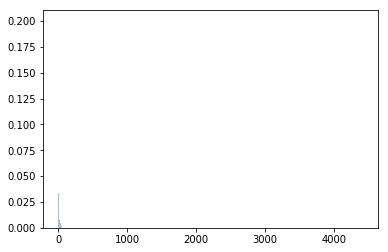

In [20]:
plt.hist(df2['CitationCount'], bins=bins, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2d185da10>]],
      dtype=object)

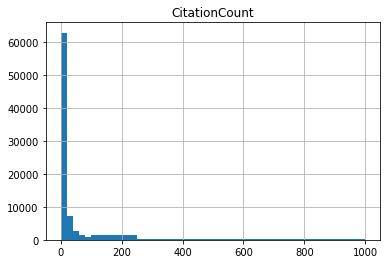

In [21]:
df2.hist(column="CitationCount", bins=[0,20,40,60,80,100,250,500,1000])

In [22]:
X_train = df2.iloc[0:60000, 0:22].values
y_train = df2.iloc[:60000, 22].values

In [23]:
X_test = df2.iloc[60000:, 0:22].values
y_test = df2.iloc[60000:, 22].values

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 4.596316568047337)
('Mean Squared Error:', 860.8895785502958)
('Root Mean Squared Error:', 29.340919865442117)


## Random split

In [28]:
X = df2.iloc[:, 0:22].values
y = df2.iloc[:, 22].values

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
#heights, bin_bounds = np.histogram(y_train, bins=3)

In [31]:

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})



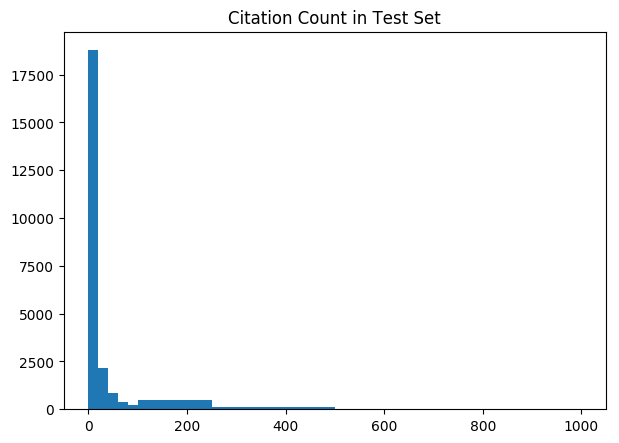

In [32]:
plt.hist(y_test, bins = [0,20,40,60,80,100,250,500,1000]) 
plt.title("Citation Count in Test Set") 
plt.show()

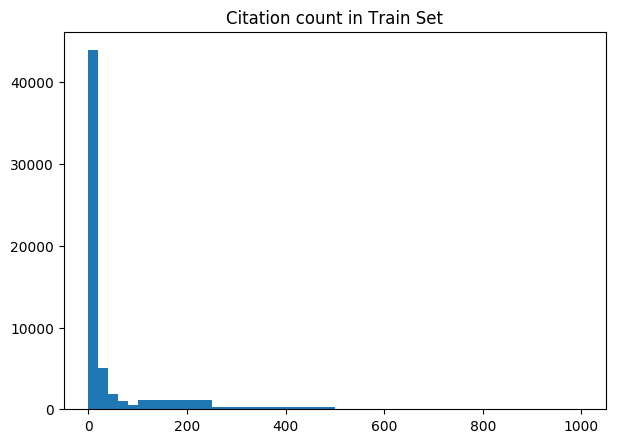

In [33]:
plt.hist(y_train, bins = [0,20,40,60,80,100,250,500,1000]) 
plt.title("Citation count in Train Set") 
plt.show()

In [34]:
#x = np.random.normal(size = 1000)
#kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)
#plt.hist(x1, **kwargs, color='g', label='Ideal')
#plt.hist(y_train,*kwargs, color='g', label='Ideal')
#plt.gca().set(title='Frequency Histogram of Citations', ylabel='Frequency')
#plt.xlim(50,75)
#plt.legend();

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 4.106512787169484)
('Mean Squared Error:', 408.5626383831816)
('Root Mean Squared Error:', 20.212932453832167)


Feature: 0, Score: 0.00527
Feature: 1, Score: 0.00398
Feature: 2, Score: 0.00321
Feature: 3, Score: 0.00485
Feature: 4, Score: 0.85748
Feature: 5, Score: 0.00695
Feature: 6, Score: 0.00463
Feature: 7, Score: 0.00837
Feature: 8, Score: 0.00332
Feature: 9, Score: 0.00354
Feature: 10, Score: 0.00262
Feature: 11, Score: 0.00285
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00549
Feature: 14, Score: 0.00527
Feature: 15, Score: 0.00029
Feature: 16, Score: 0.04787
Feature: 17, Score: 0.00742
Feature: 18, Score: 0.00385
Feature: 19, Score: 0.01532
Feature: 20, Score: 0.00414
Feature: 21, Score: 0.00328


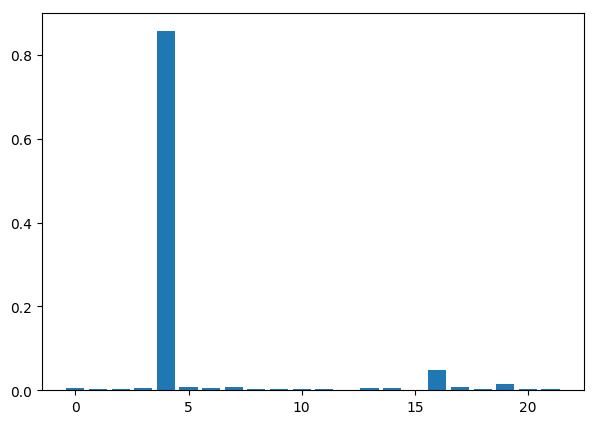

In [38]:
from matplotlib import pyplot
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [39]:
df2.head(2)

,PaperRefCnt,avg(AffiliationRank),avg(AfPaperCount),avg(AfCitationCount),Paper_Rank,Paper_RefCnt,Journal_Rank,Journal_Pap_Cnt,Journal_Cit_Cnt,CSRank,...,CIPaperCount,CIPaperCitationCnt,DocTypeIndex,max_AuthorRank,min_AutPaperCount,max_AutPaperCount,min_AutCitationCount,max_AutCitationCount,min_AuthorRank,CitationCount
0,20,7573.5,144863.0,6181726.75,19535,20,8166,4503,203353,10367,...,457,7357,0.0,18422,6,342,150,7999,14057,19
1,55,6247.0,288528.0,20686665.00,17891,55,9072,9299,121450,7775,...,702,16534,0.0,16606,8,176,795,8024,14777,175


In [40]:
df_new = spark.read.options(header = True, inferSchema = True,delimiter=',').csv("DataAfterModel-6.csv")

In [41]:
df_new.head()

Row(PaperID=9248908, PaperRefCnt=20, avg(PaperID)=9248908.0, avg(AffiliationRank)=7573.5, avg(AfPaperCount)=144863.0, avg(AfCitationCount)=6181726.75, Paper_Rank=19535, Paper_RefCnt=20, CitationCount=19, EstimatedCount=19, Journal_Rank=8166, Journal_Pap_Cnt=4503, Journal_Cit_Cnt=203353, CSRank=10367, CSPaperCount=6323, CSCitation=253240, CIRank=25000, CIPaperCount=457, CIPaperCitationCnt=7357, DocTypeIndex=0.0, max_AuthorRank=18422, min_AutPaperCount=6, max_AutPaperCount=342, min_AutCitationCount=150, max_AutCitationCount=7999, min_AuthorRank=14057)

In [42]:
df_new.columns

['PaperID',
 'PaperRefCnt',
 'avg(PaperID)',
 'avg(AffiliationRank)',
 'avg(AfPaperCount)',
 'avg(AfCitationCount)',
 'Paper_Rank',
 'Paper_RefCnt',
 'CitationCount',
 'EstimatedCount',
 'Journal_Rank',
 'Journal_Pap_Cnt',
 'Journal_Cit_Cnt',
 'CSRank',
 'CSPaperCount',
 'CSCitation',
 'CIRank',
 'CIPaperCount',
 'CIPaperCitationCnt',
 'DocTypeIndex',
 'max_AuthorRank',
 'min_AutPaperCount',
 'max_AutPaperCount',
 'min_AutCitationCount',
 'max_AutCitationCount',
 'min_AuthorRank']

In [43]:
df_final = df_new.withColumnRenamed("CitationCount","label")

In [44]:
drop_cols = ["PaperID","avg(PaperID)","EstimatedCount"]
df_final = df_final.drop(*drop_cols)

In [45]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer
feature_list = []
for col in df_final.columns:
    if col == 'label':
        continue
    else:
        feature_list.append(col)
# Concatenates all feature columns into a single feature vector in a new column "rawFeatures"
vectorAssembler = VectorAssembler(inputCols=feature_list, outputCol="features")
# Identifies categorical features and indexes them
#vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=4)

In [46]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [47]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(labelCol="label", featuresCol="features")
#rf = RandomForestRegressor(featuresCol="features")

In [48]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, rf])

In [49]:
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

In [50]:
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=3)

In [51]:
(train, test) = df_final.randomSplit([0.8, 0.2])

In [52]:
cvModel = crossval.fit(train)

Text(0.5,1,'Feature Importances')

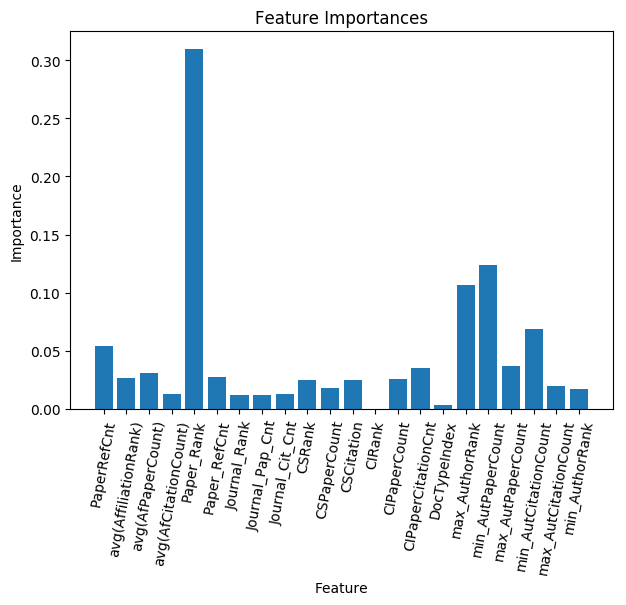

In [53]:
bestPipeline = cvModel.bestModel
bestModel = bestPipeline.stages[1]

importances = bestModel.featureImportances

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=80)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')